In [186]:
import pandas as pd
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [187]:
caminho_arquivo_excel = '/content/drive/MyDrive/ProjetoVeins/ModeloRegressaoLinear/dataset80vh (1).xlsx'
df = pd.read_excel(caminho_arquivo_excel)
print(df.head())

   ID  Posicao  Velocidade
0  16        0           0
1  16       30           1
2  16       31           3
3  16       35           5
4  16       41           6


In [188]:
series_contagem = []

contador_por_id = {}

for indice, linha in df.iterrows():
    id_atual = linha['ID']

    # Se o id atual não existir no dicionário, inicializa o contador para 1
    if id_atual not in contador_por_id:
        contador_por_id[id_atual] = 1
    else:
        # Caso contrário, incrementa o contador
        contador_por_id[id_atual] += 1

    # Adiciona o valor do contador à lista
    series_contagem.append(contador_por_id[id_atual])


df['Tempo'] = series_contagem

print(df)

       ID  Posicao  Velocidade  Tempo
0      16        0           0      1
1      16       30           1      2
2      16       31           3      3
3      16       35           5      4
4      16       41           6      5
...   ...      ...         ...    ...
2976  496      524          19     31
2977  496      543          18     32
2978  496      562          20     33
2979  496      582          20     34
2980  496      603          20     35

[2981 rows x 4 columns]


In [189]:
filtered_df = df[df['ID'] == 16]
print(filtered_df)

    ID  Posicao  Velocidade  Tempo
0   16        0           0      1
1   16       30           1      2
2   16       31           3      3
3   16       35           5      4
4   16       41           6      5
5   16       47           8      6
6   16       56           9      7
7   16       66          11      8
8   16       77          13      9
9   16       91          16     10
10  16      107          18     11
11  16      126          20     12
12  16      146          21     13
13  16      167          22     14
14  16      189          21     15
15  16      210          21     16
16  16      231          21     17
17  16      253          21     18
18  16      275          22     19
19  16      297          21     20
20  16      318          21     21
21  16      340          21     22
22  16      361          21     23
23  16      382          22     24
24  16      404          21     25
25  16      426          22     26
26  16      448          21     27
27  16      470     

In [190]:
# Reorganizando as colunas e removendo a coluna 'ID'
df_reorganized = filtered_df[['Tempo', 'Velocidade', 'Posicao']]

# Mostrando o DataFrame reorganizado
print("\nDataFrame Reorganizado:")
print(df_reorganized)



DataFrame Reorganizado:
    Tempo  Velocidade  Posicao
0       1           0        0
1       2           1       30
2       3           3       31
3       4           5       35
4       5           6       41
5       6           8       47
6       7           9       56
7       8          11       66
8       9          13       77
9      10          16       91
10     11          18      107
11     12          20      126
12     13          21      146
13     14          22      167
14     15          21      189
15     16          21      210
16     17          21      231
17     18          21      253
18     19          22      275
19     20          21      297
20     21          21      318
21     22          21      340
22     23          21      361
23     24          22      382
24     25          21      404
25     26          22      426
26     27          21      448
27     28          22      470
28     29          22      492
29     30          21      514
30     31     

In [191]:
print(df_reorganized.corr())

               Tempo  Velocidade   Posicao
Tempo       1.000000    0.811442  0.991612
Velocidade  0.811442    1.000000  0.733820
Posicao     0.991612    0.733820  1.000000


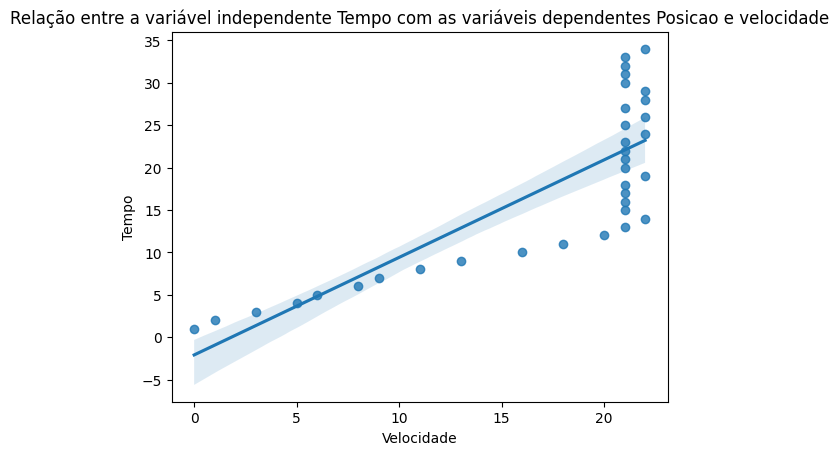

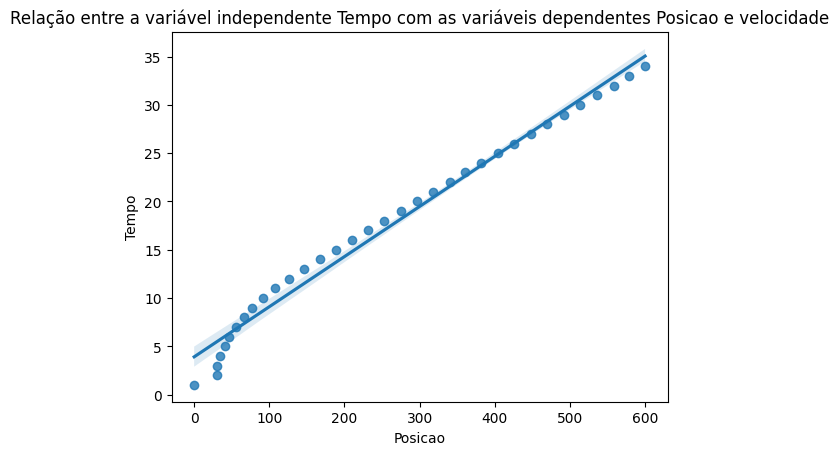

In [192]:
# Mostra a relação da variável independente Tempo com as variáveis dependentes Velocidade e posição.

import seaborn as sns

variables = ['Velocidade', 'Posicao']

for var in variables:
    plt.figure()
    sns.regplot(x=var, y='Tempo', data=df_reorganized).set(title=f'Relação entre a variável independente Tempo com as variáveis dependentes Posicao e velocidade');

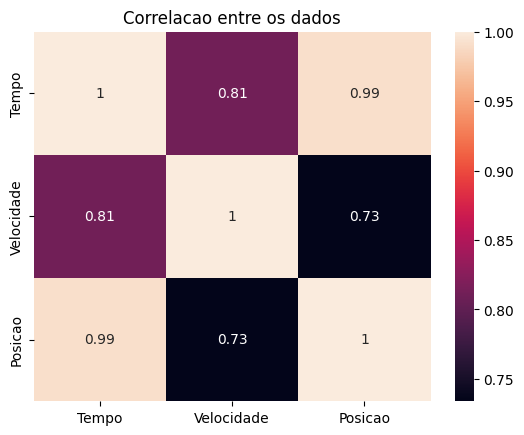

In [193]:
# Correlação entre os dados do dataframe

correlations = df_reorganized.corr()
# annot=True displays the correlation values
sns.heatmap(correlations, annot=True).set(title='Correlacao entre os dados');

In [194]:
y = filtered_df['Tempo']
X = filtered_df[['Velocidade', 'Posicao']]

In [195]:
from sklearn.model_selection import train_test_split

In [196]:
SEED = 42

In [197]:
# Define que 20% dos dados serão para teste

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=SEED)

In [198]:
X.shape

(34, 2)

In [199]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [200]:
# Altura que a linha começa

regressor.intercept_

1.3472480738197987

In [201]:
# Importância de cada variável para o modelo

regressor.coef_

array([0.2546889 , 0.04502257])

In [202]:
# Números que multiplicam as variáveis independentes para prever a variável dependente

feature_names = X.columns
model_coefficients = regressor.coef_

coefficients_df = pd.DataFrame(data = model_coefficients,
                              index = feature_names,
                              columns = ['Coefficient value'])
print(coefficients_df)

            Coefficient value
Velocidade           0.254689
Posicao              0.045023


In [203]:
y_pred = regressor.predict(X_test)

In [204]:
resultado = pd.DataFrame({'Atual': y_test, 'Predicao': y_pred})
print(resultado)

    Atual   Predicao
15     16  16.150454
19     20  20.067418
27     28  28.111011
26     27  26.865826
8       9   8.124942
24     25  24.884833
21     22  22.003388
12     13  13.269010
32     33  32.763782
9      10   9.519324
0       1   1.347248


In [205]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [206]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print(f'Mean absolute error: {mae:.2f}')
print(f'Mean squared error: {mse:.2f}')
print(f'Root mean squared error: {rmse:.2f}')

Mean absolute error: 0.25
Mean squared error: 0.12
Root mean squared error: 0.35


In [207]:
actual_minus_predicted = sum((y_test - y_pred)**2)
actual_minus_actual_mean = sum((y_test - y_test.mean())**2)
r2 = 1 - actual_minus_predicted/actual_minus_actual_mean
print('R²:', r2)

R²: 0.9985917755262372


In [208]:
regressor.score(X_train, y_train)

0.9984415603413521